<a href="https://colab.research.google.com/github/asif79941/projects/blob/main/Fraud_Detection_in_Credit_Card_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve, f1_score


In [ ]:
data=pd.read_csv("/content/CreditCardData.csv")
data.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [ ]:
data.isnull().sum()

,0
Transaction ID,0
Date,0
Day of Week,0
Time,0
Type of Card,0
Entry Mode,0
Amount,6
Type of Transaction,0
Merchant Group,10
Country of Transaction,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
Transaction ID,0
Date,0
Day of Week,0
Time,0
Type of Card,0
Entry Mode,0
Amount,0
Type of Transaction,0
Merchant Group,0
Country of Transaction,0


In [ ]:
data = data.drop(columns=['Day of Week'])

In [ ]:
data.head()

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [ ]:
data['Amount'] = data['Amount'].replace('£', '', regex=True).astype(int)

In [ ]:
data["Amount"].head()

,Amount
0,5
1,288
2,5
3,28
4,91


In [ ]:
data_fraud = data[data['Fraud'] == 1]
data_fraud.head()

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,#2771 031,13-Oct-20,23,Visa,CVC,91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
11,#3474 192,14-Oct-20,1,MasterCard,PIN,106,POS,Fashion,Russia,Russia,United Kingdom,F,48.7,Metro,1
16,#3513 029,13-Oct-20,0,MasterCard,CVC,25,Online,Food,Russia,Russia,United Kingdom,M,54.3,Barlcays,1
37,#3316 175,14-Oct-20,3,MasterCard,PIN,5,ATM,Services,China,China,United Kingdom,F,62.8,Barlcays,1
42,#2617 497,14-Oct-20,4,Visa,PIN,206,POS,Children,United Kingdom,India,United Kingdom,M,46.3,Barclays,1


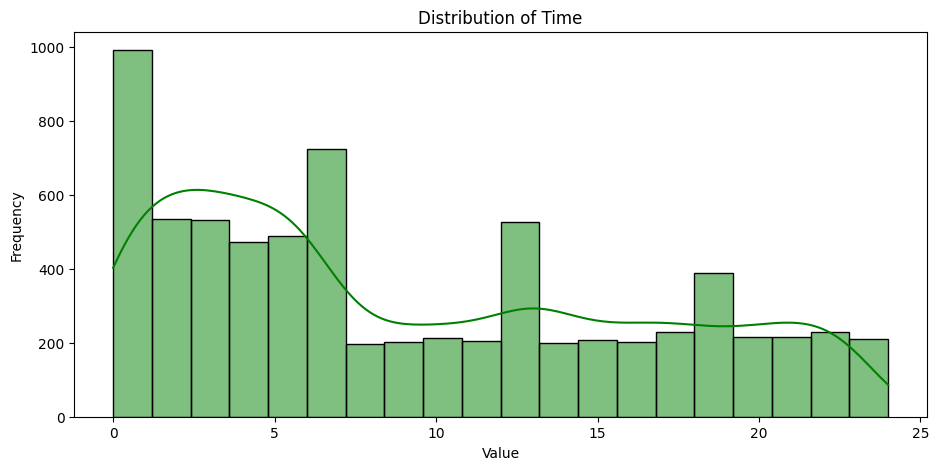

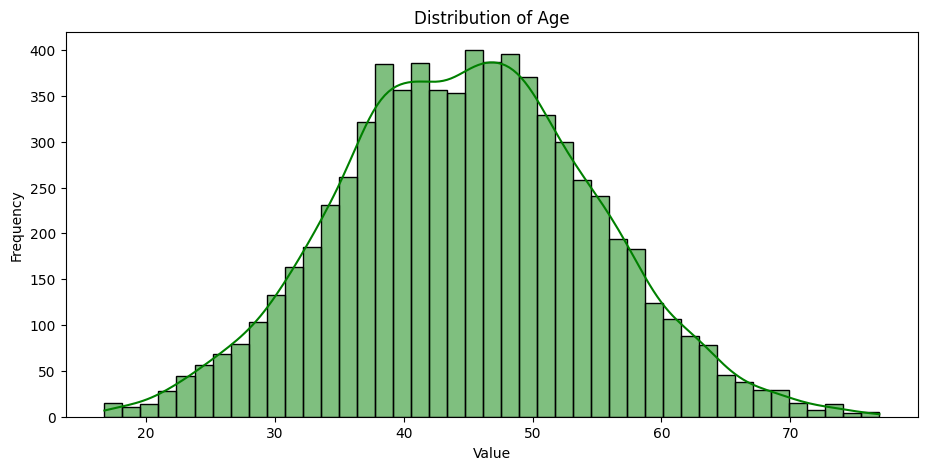

In [ ]:
column = ['Time', 'Merchant Group', 'Country of Transaction', 'Shipping Address', 'Age', 'Bank', 'Country of Residence']

for column in column:
    if data_fraud[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(11, 5))
        sns.histplot(data_fraud[column],kde=True,color="green")
        plt.title(f'Distribution of {column}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

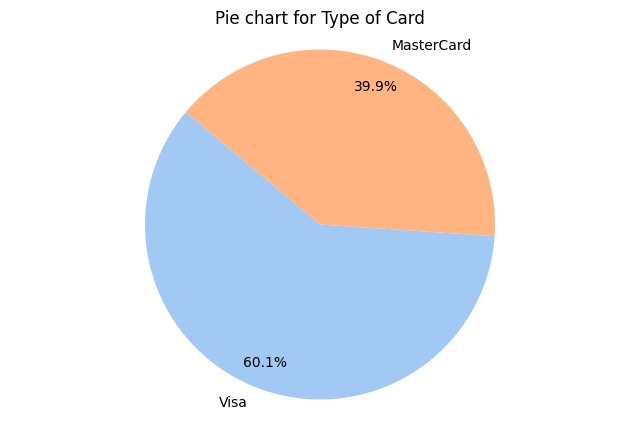

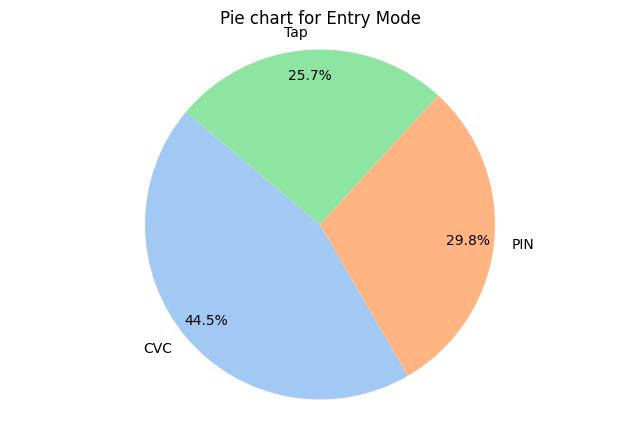

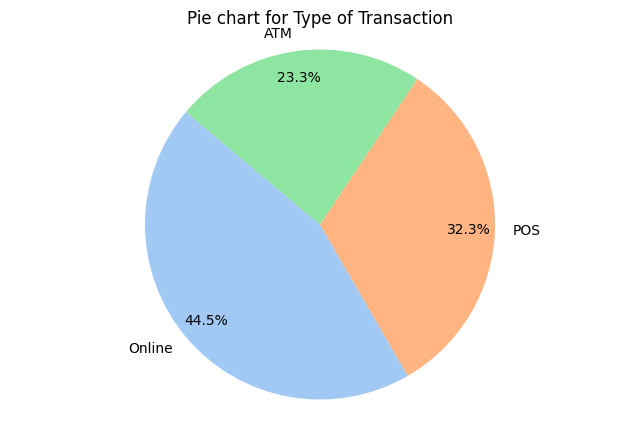

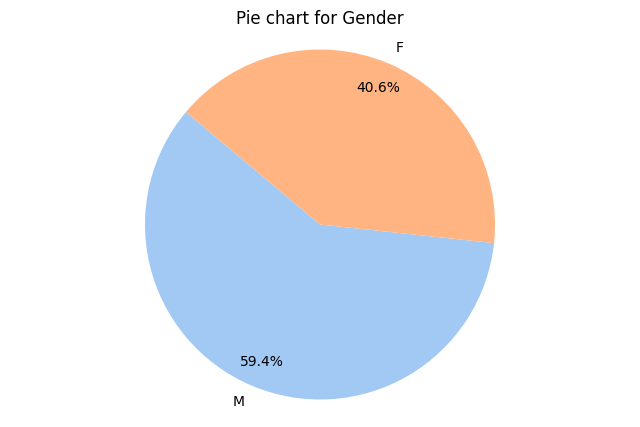

In [ ]:
column_piechart = ['Type of Card', 'Entry Mode', 'Type of Transaction', 'Gender']
for column in column_piechart:
    if data_fraud[column].dtype in ['object', 'int64']:
        value_counts = data_fraud[column].value_counts()
        plt.figure(figsize=(8, 5))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85,colors=sns.color_palette('pastel'))
        plt.title(f'Pie chart for {column}')
        plt.axis('equal')
        plt.show()

In [ ]:
lb=LabelEncoder()
categorical_cols = ["Type of Card","Entry Mode","Type of Transaction","Merchant Group","Country of Transaction",	"Shipping Address","Country of Residence","Gender","Bank"]
for col in categorical_cols:
  data[col] = lb.fit_transform(data[col])

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.day

<ipython-input-68-02b4ffd44659>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data.head()

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14,19,1,2,5,2,2,4,4,4,1,25.2,7,0
1,#3039 221,14,17,0,1,288,2,8,3,3,3,0,49.6,4,0
2,#2694 780,14,14,1,2,5,2,7,1,1,1,0,42.2,0,0
3,#2640 960,13,14,1,2,28,2,2,4,1,4,0,51.0,0,0
4,#2771 031,13,23,1,0,91,1,1,3,3,4,1,38.0,3,1


In [ ]:
x = data.drop(columns=['Transaction ID', 'Fraud'])
y = data['Fraud']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
model = RandomForestClassifier(criterion = 'gini',max_depth= 20,min_samples_leaf= 2,min_samples_split= 2,n_estimators= 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9855971194238847
[[18506    29]
 [  259  1202]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18535
           1       0.98      0.82      0.89      1461

    accuracy                           0.99     19996
   macro avg       0.98      0.91      0.94     19996
weighted avg       0.99      0.99      0.99     19996



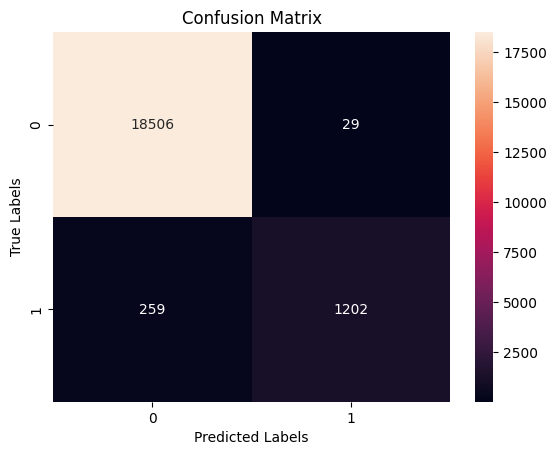

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("F1 Score:", f1)

F1 Score: 0.8930163447251115


In [ ]:
import joblib
joblib.dump(model, 'fraud_detection_creditcard_model.pkl')

['fraud_detection_creditcard_model.pkl']